In [2]:
# Name : Shreya Dharmadhikari
# Class : TE Computer 
# Div : "A"
# Roll No : 31014
# Problem Statement : Apply Basic PCA on the iris dataset. 
# The data set is available at: 
# https://raw.github.com/neurospin/pystatsml/master/datasets/iris.csv
# • Describe the data set. Should the dataset been standardized?
# • Describe the structure of correlations among variables.
# • Compute a PCA with the maximum number of components
# • Compute the cumulative explained variance ratio. Determine the number of 
# components𝐾by your computed values.
# • Print the𝐾 principal components directions and correlations of the𝐾principal components with the original variables. Interpret the contribution of the original variables into 
# the PC.
# • Plot the samples projected into the𝐾first PCs.
# • Color samples by their species.


In [7]:
from sklearn import datasets
import pandas as pd                             # import all the required libraries 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [9]:
df=pd.read_csv(r"C:\Users\Suhas\Desktop\AI and ML\Iris_dataset.csv")

In [10]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#Thus standardization is necessary

In [13]:
# split data table into data X and class labels y

X = df.iloc[:,0:4]
Y = df.iloc[:,4]

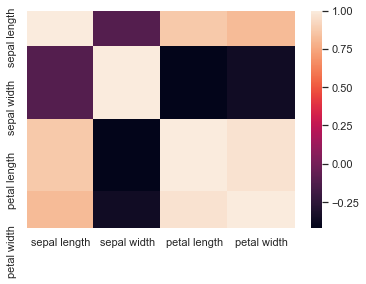

In [14]:
#find pairwise correlation of columns
corr=df.corr()
sns.heatmap(corr)

# Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X_std=StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

<h2> Compute a PCA with the maximum number of components </h2>

In [17]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [18]:
cum_var_exp=np.cumsum(sklearn_pca.explained_variance_ratio_)

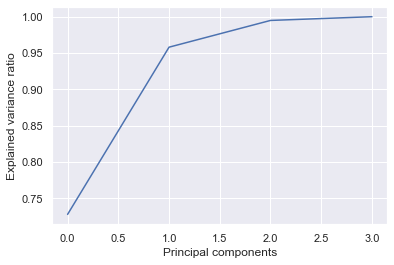

In [19]:
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.plot(cum_var_exp)

In [20]:
print(cum_var_exp)

[0.72770452 0.95800975 0.99484807 1.        ]


In [21]:
# contribute of the first two principal components  given by second term in cumulative explained variance ratio
print('first two principal components contribute',cum_var_exp[1])

first two principal components contribute 0.9580097536148199


<h4>This shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information while the third and fourth principal components can safely be dropped without losing too much information. Together, the first two principal components contain 95.8% of the information.</h4>

<h1> PCA computation </h1>

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

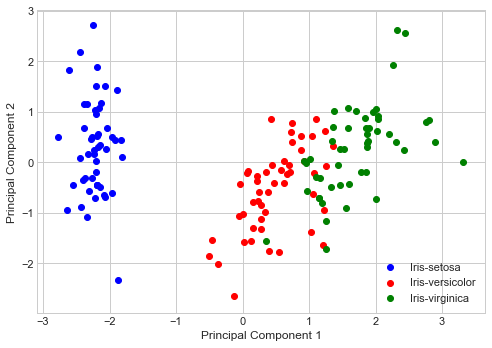

In [23]:
t=('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7,5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[Y==lab, 0],
                    Y_sklearn[Y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(t)
    plt.tight_layout()
    plt.show()

<h1> Explained variance </h1>

In [24]:
# Calculate the variance explained by priciple components
print('Variance of each component:', sklearn_pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(sklearn_pca.explained_variance_ratio_))*100, 2))


Variance of each component: [0.72770452 0.23030523]

 Total Variance Explained: 95.8


In [27]:
#We can see that our first two principal components explain the majority of the variance in this 
#dataset (95.81%)! This is an indication of the total information represented compared to the original data.